# 0. IMPORTS

## 0.1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inflection

## 0.2. Loading data

In [2]:
url = 'https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json'
df = pd.read_json(url)

## 0.3. Dicionário de dados

Nome | Descrição
--|--
customerID | número de identificação único de cada cliente
Churn | se o cliente deixou ou não a empresa 
gender | gênero (masculino e feminino) 
SeniorCitizen | informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
Partner |  se o cliente possui ou não um parceiro ou parceira
Dependents | se o cliente possui ou não dependentes
tenure |  meses de contrato do cliente
PhoneService | assinatura de serviço telefônico 
MultipleLines | assisnatura de mais de uma linha de telefone 
InternetService | assinatura de um provedor internet 
OnlineSecurity | assinatura adicional de segurança online 
OnlineBackup | assinatura adicional de backup online 
DeviceProtection | assinatura adicional de proteção no dispositivo 
TechSupport | assinatura adicional de suporte técnico, menos tempo de espera
StreamingTV | assinatura de TV a cabo 
StreamingMovies | assinatura de streaming de filmes 
Contract | tipo de contrato
PaperlessBilling | se o cliente prefere receber online a fatura
PaymentMethod | forma de pagamento
Charges.Monthly | total de todos os serviços do cliente por mês
Charges.Total | total gasto pelo cliente

## 0.3. Helper functions

In [95]:
def rename_columns(cols):
    cols = list(map(lambda x: inflection.titleize(x), cols))
    cols = list(map(lambda x: x.replace(" ", ""), cols))
    cols = list(map(lambda x: x.replace(".", ""), cols))
    cols = list(map(lambda x: inflection.underscore(x), cols))
    return cols

def tab_unique(df):
    tab_unicos = pd.DataFrame(df.nunique())
    tab_unicos.columns= ['count']
    tab_unicos['content'] = df.apply(lambda x: x.unique())
    return tab_unicos

## 0.4. Identidade Visual

In [330]:
paleta_personalizada = {
    'black': '#171821',
    'purple': '#872b95',
    'orange': '#ff7131',
    'pink': '#fe3d67'
}

# 1. DATA DESCRIPTION

In [4]:
df1 = df.copy()

## 1.1. Normalize Columns

In [5]:
# Normalizar colunas com dicionários aninhados
columns_to_normalize = ['customer', 'phone', 'internet', 'account']
for col in columns_to_normalize:
    df1 = pd.concat([df1.drop([col], axis=1), pd.json_normalize(df1[col])], axis=1)
df1.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 1.2. Rename Columns

In [8]:
df1.columns = rename_columns(df1.columns)
df1.head()

,customer,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 1.3. Data Dimensions

In [9]:
print('Quantidade de linha: {:,}'.format(df1.shape[0]))
print('Quantidade de colunas: {:,}'.format(df1.shape[1]))

Quantidade de linha: 7,267
Quantidade de colunas: 21


## 1.4. Data Types

In [10]:
df1.dtypes

customer              object
churn                 object
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
charges_monthly      float64
charges_total         object
dtype: object

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer           7267 non-null   object 
 1   churn              7267 non-null   object 
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   object 
 5   dependents         7267 non-null   object 
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   object 
 8   multiple_lines     7267 non-null   object 
 9   internet_service   7267 non-null   object 
 10  online_security    7267 non-null   object 
 11  online_backup      7267 non-null   object 
 12  device_protection  7267 non-null   object 
 13  tech_support       7267 non-null   object 
 14  streaming_tv       7267 non-null   object 
 15  streaming_movies   7267 non-null   object 
 16  contract           7267 

## 1.5. Check NA's

In [13]:
# Aparentemente não há NA's, mas é necessário analisar mais de perto cada feature
df1.isna().sum()

customer             0
churn                0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
charges_monthly      0
charges_total        0
dtype: int64

In [94]:
# Nota-se que existem Na's:
# > churn == ' '
# > na terceira opção de algumas features de 'Yes' ou 'No' 
# > charges_total == ' '
tab_unique(df1)

,count,content
customer,7267,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
churn,3,"[No, Yes, ]"
gender,2,"[Female, Male]"
senior_citizen,2,"[0, 1]"
partner,2,"[Yes, No]"
dependents,2,"[Yes, No]"
tenure,73,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
phone_service,2,"[Yes, No]"
multiple_lines,3,"[No, Yes, No phone service]"
internet_service,3,"[DSL, Fiber optic, No]"


In [15]:
df1['payment_method'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

# 2. FEATURE ENGINEERING

In [406]:
df2 = df1.copy()

# 3. FILTRAGEM DE VARIÁVEIS

In [407]:
df3 = df2.copy()

## 3.1. Filtragem das Linhas

### 3.1.1. Remover linhas com churn vazio

In [408]:
# Precisamos remover dados com churn vazio. os vazios representam 3,08% dos dados.
churn_vazios = df3['churn'].value_counts().to_frame()
churn_vazios.columns = ['count']
churn_vazios['%'] = round(df3['churn'].value_counts(normalize=True).sort_values() * 100, 2)
churn_vazios

,count,%
No,5174,71.20
Yes,1869,25.72
,224,3.08


In [409]:
# Selecionar as linhas com churn vazio
churn_vazio = df3.query('churn == ""').index

# Deletar essas linhas
df3.drop(churn_vazio, axis=0, inplace=True)

# Validar alterações
df3['churn'].unique()

array(['No', 'Yes'], dtype=object)

In [410]:
# Resetar o index e validar modificações
df3 = df3.reset_index(drop=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer           7043 non-null   object 
 1   churn              7043 non-null   object 
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   object 
 5   dependents         7043 non-null   object 
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   object 
 8   multiple_lines     7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

### 3.1.2. Substituir a terceira opção por 'No'

In [411]:
col_yes_no = ['multiple_lines', 'online_security', 'online_backup', 
              'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

for col in col_yes_no:
    df3[col] = df3[col].apply(lambda x: 'No' if x not in ['Yes', 'No'] else x)

In [412]:
for col in col_yes_no:
    print(col, df3[col].unique())

multiple_lines ['No' 'Yes']
online_security ['No' 'Yes']
online_backup ['Yes' 'No']
device_protection ['No' 'Yes']
tech_support ['Yes' 'No']
streaming_tv ['Yes' 'No']
streaming_movies ['No' 'Yes']


### 3.1.3. Tratar linhas com 'charges_total' vazio

In [413]:
# Ao tratar a coluna 'charges_total' tb será necessário tratar 'tenure'
df3.loc[df3['charges_total'] == ' ', ['tenure', 'contract', 'charges_monthly', 'charges_total']]

,tenure,contract,charges_monthly,charges_total
945,0,Two year,56.05,
1731,0,Two year,20.00,
1906,0,Two year,61.90,
2025,0,One year,19.70,
2176,0,Two year,20.25,
2250,0,Two year,25.35,
2855,0,Two year,73.35,
3052,0,Two year,25.75,
3118,0,Two year,52.55,
4054,0,Two year,80.85,


In [414]:
idx1 = df3.loc[(df3['charges_total'] == ' ') & (df3['contract'] == 'One year'), ['contract', 'charges_monthly', 'charges_total']].index
idx2 = df3.loc[(df3['charges_total'] == ' ') & (df3['contract'] == 'Two year'), ['contract', 'charges_monthly', 'charges_total']].index

In [415]:
df3.loc[idx1, 'charges_total'] = df3['charges_monthly'] * 12
df3.loc[idx2, 'charges_total'] = df3['charges_monthly'] * 24

In [416]:
df3.loc[idx1, ['tenure', 'contract', 'charges_monthly', 'charges_total']]

,tenure,contract,charges_monthly,charges_total
2025,0,One year,19.7,236.4


In [417]:
df3.loc[idx2, ['tenure', 'contract', 'charges_monthly', 'charges_total']]

,tenure,contract,charges_monthly,charges_total
945,0,Two year,56.05,1345.2
1731,0,Two year,20.00,480.0
1906,0,Two year,61.90,1485.6
2176,0,Two year,20.25,486.0
2250,0,Two year,25.35,608.4
2855,0,Two year,73.35,1760.4
3052,0,Two year,25.75,618.0
3118,0,Two year,52.55,1261.2
4054,0,Two year,80.85,1940.4
5433,0,Two year,19.85,476.4


In [418]:
df3['charges_total'] = df3['charges_total'].astype(np.float64)

### 3.1.4. Tratar linhas com 'tenure' igual a 0

In [419]:
idx = df3.loc[df3['tenure'] == 0, ['tenure', 'contract', 'charges_monthly', 'charges_total']].index

In [420]:
df3.loc[idx, 'tenure'] = np.ceil(df3['charges_total'] / df3['charges_monthly']).astype(np.int64)

In [421]:
df3.loc[idx, ['tenure', 'contract', 'charges_monthly', 'charges_total']]

,tenure,contract,charges_monthly,charges_total
945,24,Two year,56.05,1345.2
1731,24,Two year,20.00,480.0
1906,24,Two year,61.90,1485.6
2025,12,One year,19.70,236.4
2176,24,Two year,20.25,486.0
2250,25,Two year,25.35,608.4
2855,24,Two year,73.35,1760.4
3052,24,Two year,25.75,618.0
3118,24,Two year,52.55,1261.2
4054,24,Two year,80.85,1940.4


## 3.2. Seleção das Colunas

### 3.2.1. Remover coluna customer

In [422]:
df3.drop('customer', axis=1, inplace=True)

### 3.2.2. Converter senior_citizen em categórico ('Yes', 'No')

In [423]:
# Converter senior_citizen em categórico ('Yes', 'No')
df3['senior_citizen'] = df3['senior_citizen'].map({0: 'No', 1: 'Yes'})

In [424]:
tab_unique(df3)

,count,content
churn,2,"[No, Yes]"
gender,2,"[Female, Male]"
senior_citizen,2,"[No, Yes]"
partner,2,"[Yes, No]"
dependents,2,"[Yes, No]"
tenure,72,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
phone_service,2,"[Yes, No]"
multiple_lines,2,"[No, Yes]"
internet_service,3,"[DSL, Fiber optic, No]"
online_security,2,"[No, Yes]"


# 4. EXPLORATORY DATA ANALYSIS (EDA)

In [462]:
df4 = df3.copy()

In [463]:
# Separar os tipos de dados categóricos dos numéricos
df_num = df4.select_dtypes(include = ['int64', 'float64'])
df_cat = df4.select_dtypes(exclude = ['int64', 'float64'])

## 4.1. Análise Univariada

* Como são as variáveis? 
* Estatística descritiva.

### 4.1.1. Response Variable

In [464]:
df4.columns

Index(['churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'charges_monthly', 'charges_total'],
      dtype='object')

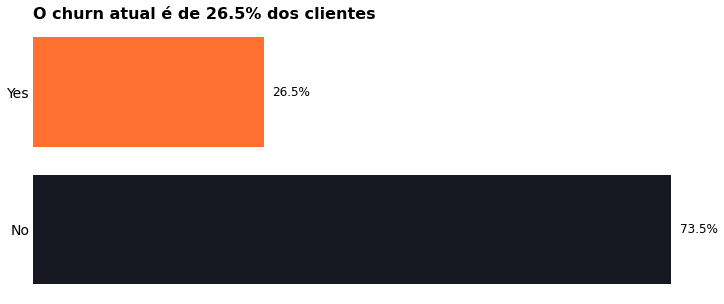

In [478]:
col = 'churn'

aux = df4[col].value_counts(normalize=True).to_frame() * 100
aux = aux.sort_values(col, ascending=False)

cores = [paleta_personalizada['orange'] if tipo == aux[col].idxmin() else 
         paleta_personalizada['black'] for tipo in aux.index]

fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(aux.index, aux[col], color=cores)

ax.yaxis.set_tick_params(labelsize=14)
ax.set_title(f'O churn atual é de {aux[col].min():.1f}% dos clientes', 
             loc='left', fontsize=16, fontweight='bold')

for i, v in enumerate(aux[col]):
    formatted_value = '{:.1f}%'.format(v)
    ax.text(v + 1, i, formatted_value, color='black', fontsize=12, ha='left', va='center')
    
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.show()

### 4.1.2. Numerical Variable

Nome | Descrição
--|--
tenure |  meses de contrato do cliente
Charges.Monthly | total de todos os serviços do cliente por mês
Charges.Total | total gasto pelo cliente

In [479]:
# Incluir: Range, kurtosis, skew e std 
num_describe = df_num.describe().T
num_describe['range'] = pd.DataFrame(df_num.apply(lambda x: x.max() - x.min()))
num_describe['skew'] = pd.DataFrame(df_num.apply(lambda x: x.skew()))
num_describe['kurtosis'] = pd.DataFrame(df_num.apply(lambda x: x.kurtosis()))
num_describe

,count,mean,std,min,25%,50%,75%,max,range,skew,kurtosis
tenure,7043.0,32.407071,24.529292,1.00,9.0,29.00,55.00,72.00,71.0,0.239486,-1.385484
charges_monthly,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75,100.5,-0.220524,-1.257260
charges_total,7043.0,2281.253259,2265.703526,18.80,401.9,1396.25,3786.60,8684.80,8666.0,0.963745,-0.227068


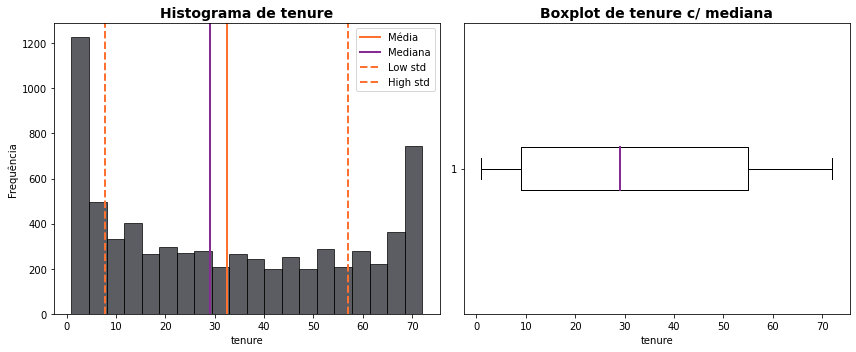

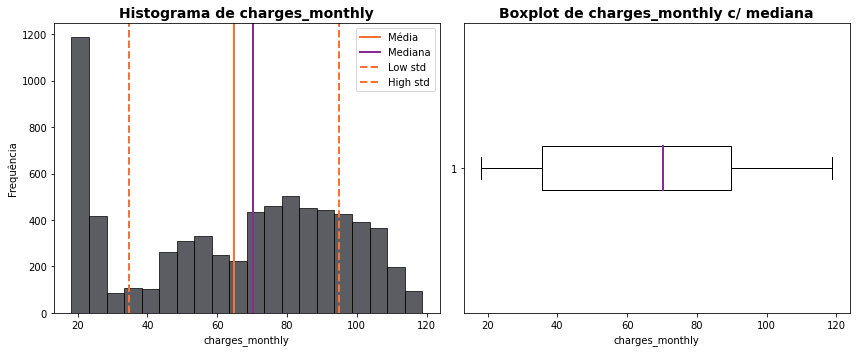

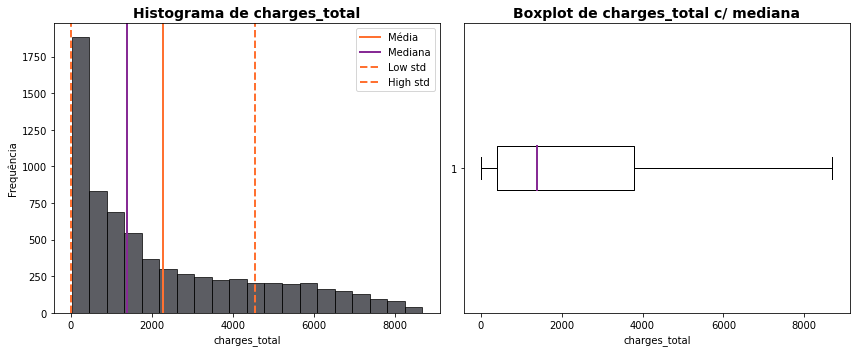

In [496]:
def grafics_num_attribute(df, col):
    # Calcular a média e a mediana
    mean_value = np.mean(df[col])
    median_value = np.median(df[col])
    std_low = mean_value - np.std(df[col])
    std_high = mean_value + np.std(df[col])

    # Criação dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plotagem do histograma no primeiro subplot
    ax1.hist(df[col], bins=20, edgecolor='black', alpha=0.7, color=paleta_personalizada['black'])
    ax1.axvline(mean_value, color=paleta_personalizada['orange'], linewidth=2, label='Média')
    ax1.axvline(median_value, color=paleta_personalizada['purple'], linewidth=2, label='Mediana')
    ax1.axvline(std_low, color=paleta_personalizada['orange'], linestyle='dashed', linewidth=2, label='Low std')
    ax1.axvline(std_high, color=paleta_personalizada['orange'], linestyle='dashed', linewidth=2, label='High std')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequência')
    ax1.set_title(f'Histograma de {col}', fontsize=14, fontweight='bold')
    ax1.legend()

    # Plotagem do boxplot no segundo subplot
    ax2.boxplot(df[col], vert=False, medianprops={'color': paleta_personalizada['purple'], 'linewidth': 2})
    ax2.set_xlabel(col)
    ax2.set_title(f'Boxplot de {col} c/ mediana', fontsize=14, fontweight='bold')

    # Ajustar espaçamento entre os subplots
    plt.tight_layout()

    # Exibir os subplots
    plt.show()

# Chamar a função para cada atributo
for col in ['tenure', 'charges_monthly', 'charges_total']:
    grafics_num_attribute(df_num, col)

### 4.1.3. Categorical Variable

Variáveis relativas ao cliente | Descrição
--|--
gender | gênero (masculino e feminino) 
SeniorCitizen | informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
Partner |  se o cliente possui ou não um parceiro ou parceira
Dependents | se o cliente possui ou não dependentes
customerID | número de identificação único de cada cliente
Churn | se o cliente deixou ou não a empresa 

Variáveis relativas ao pagamento | Descrição
--|--
Contract | tipo de contrato
PaperlessBilling | se o cliente prefere receber online a fatura
PaymentMethod | forma de pagamento

Variáveis relativas aos serviços contratados | Descrição
--|--
PhoneService | assinatura de serviço telefônico 
MultipleLines | assisnatura de mais de uma linha de telefone 
InternetService | assinatura de um provedor internet 
OnlineSecurity | assinatura adicional de segurança online 
OnlineBackup | assinatura adicional de backup online 
DeviceProtection | assinatura adicional de proteção no dispositivo 
TechSupport | assinatura adicional de suporte técnico, menos tempo de espera
StreamingTV | assinatura de TV a cabo 
StreamingMovies | assinatura de streaming de filmes 

In [486]:
binary_cols = list(tab_unique(df_cat).query('count == 2').T.columns)

# Remover gender
yes_no_cols = ['senior_citizen', 'partner', 'dependents', 'phone_service', 
               'multiple_lines', 'online_security', 'online_backup', 'device_protection',
               'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']

In [487]:
# Selecionar apenas as colunas categóricas NÃO binárias
not_binary_cols = list(tab_unique(df_cat).query('count > 2').T.columns)
df_cat_not_binary = df_cat.loc[:, not_binary_cols]

for col in df_cat_not_binary.columns:
    print(col, df_cat_not_binary[col].unique())

internet_service ['DSL' 'Fiber optic' 'No']
contract ['One year' 'Month-to-month' 'Two year']
payment_method ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


#### 4.1.3.1. Binary columns "Yes" or "No" columns

In [488]:
df_yes_no = df_cat.loc[:, yes_no_cols]

for col in df_yes_no.columns:
    print(col, df_yes_no[col].unique())

senior_citizen ['No' 'Yes']
partner ['Yes' 'No']
dependents ['Yes' 'No']
phone_service ['Yes' 'No']
multiple_lines ['No' 'Yes']
online_security ['No' 'Yes']
online_backup ['Yes' 'No']
device_protection ['No' 'Yes']
tech_support ['Yes' 'No']
streaming_tv ['Yes' 'No']
streaming_movies ['No' 'Yes']
paperless_billing ['Yes' 'No']


In [489]:
# Constroi tabela com % de cada categoria
def make_table_yes_no(df, col):
    table_yes_no[col] = df[col].value_counts(normalize=True) * 100
    return table_yes_no

# Colunas com categorias 'Yes' e 'No'
list_yes_no = yes_no_cols

table_yes_no = df4['senior_citizen'].value_counts(normalize=True).to_frame() * 100
for col in list_yes_no:
    table_yes_no = make_table_yes_no(df_cat, col)
    
table_yes_no = table_yes_no.T
table_yes_no_sorted = table_yes_no.sort_values(by='Yes', ascending=True)
table_yes_no_sorted

,No,Yes
senior_citizen,83.785319,16.214681
online_security,71.333239,28.666761
tech_support,70.978276,29.021724
dependents,70.041176,29.958824
device_protection,65.611245,34.388755
online_backup,65.511856,34.488144
streaming_tv,61.564674,38.435326
streaming_movies,61.209712,38.790288
multiple_lines,57.816271,42.183729
partner,51.696720,48.303280


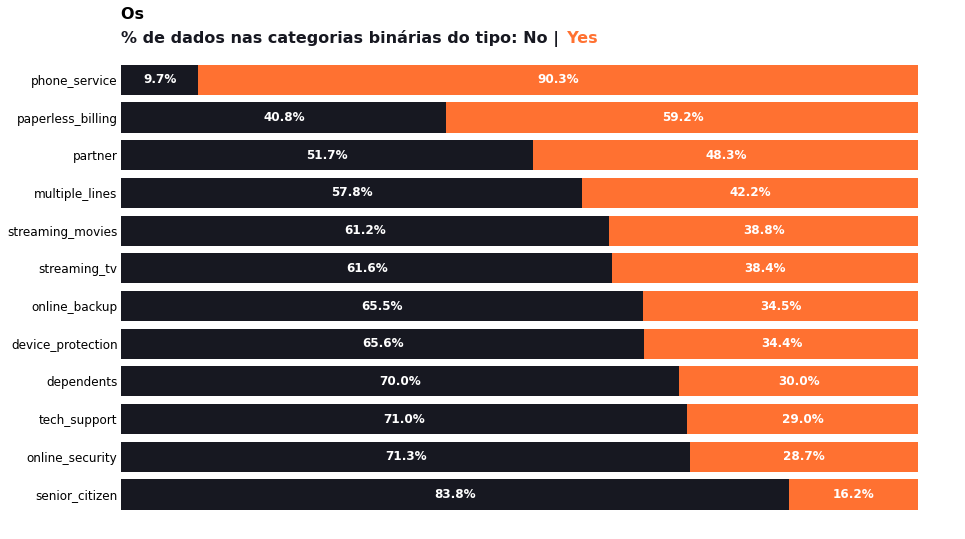

In [623]:
# Crie um gráfico de barras empilhadas horizontal
fig, ax = plt.subplots(figsize=(15, 9))

# Primeira camada (valores "Yes")
ax.barh(table_yes_no_sorted.index, table_yes_no_sorted['No'], color=paleta_personalizada['black'])
ax.set_title('Os \n', 
             loc='left', fontsize=16, fontweight='bold')

# Segunda camada (valores "No")
ax.barh(table_yes_no_sorted.index, table_yes_no_sorted['Yes'], left=table_yes_no_sorted['No'], color=paleta_personalizada['orange'])

# Adicionar "Yes" com uma cor diferente
ax.yaxis.set_tick_params(labelsize=12)
ax.text(0, 1, '% de dados nas categorias binárias do tipo: No | ', 
        color=paleta_personalizada['black'], fontsize=16, fontweight='bold', transform=ax.transAxes)

ax.text(0.52, 1, '  Yes', color=paleta_personalizada['orange'], 
        fontsize=16, fontweight='bold', transform=ax.transAxes)


ax.legend(loc='upper center', ncol=2, frameon=False, labels=[]).set_visible(False)
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
    
# Adicionar os valores dentro das barras
for c in ax.containers:
    labels = [f'{w:0.1f}%' if (w := v.get_width()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', padding=0.3, color='w', fontsize=12, fontweight='bold')
    
# Adicionar um título ao gráfico
#ax.set_title('Título do Gráfico', fontsize=18, fontweight='bold')

plt.show();

#### 4.1.3.2. internet_service

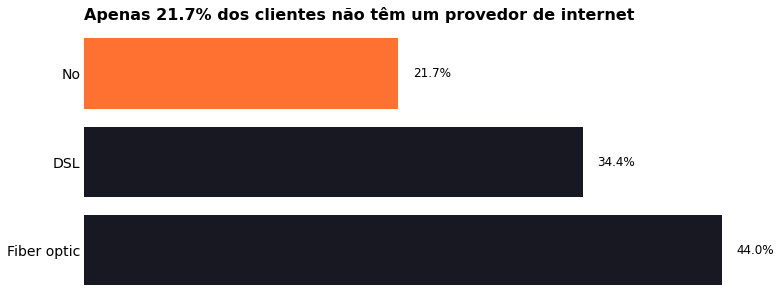

In [491]:
col = 'internet_service'

aux = df_cat_not_binary[col].value_counts(normalize=True).to_frame() * 100
aux = aux.sort_values(col, ascending = False)

cores = [paleta_personalizada['orange'] if tipo == aux[col].idxmin() else 
         paleta_personalizada['black'] for tipo in aux.index]

fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(aux.index, aux[col], color=cores)
ax.yaxis.set_tick_params(labelsize=14)

ax.set_title(f'Apenas {aux[col].min():.1f}% dos clientes não têm um provedor de internet', 
             loc='left', fontsize=16, fontweight='bold')

for i, v in enumerate(aux[col]):
    formatted_value = '{:.1f}%'.format(v)
    ax.text(v + 1, i, formatted_value, color='black', fontsize=12, ha='left', va='center')
    
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.show()

#### 4.1.3.3. Contract

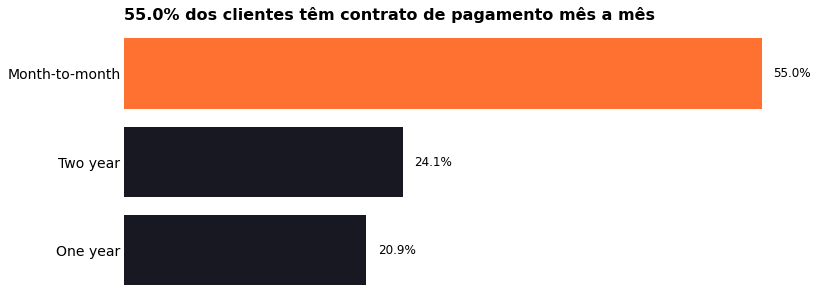

In [492]:
col = 'contract'

aux = df_cat_not_binary[col].value_counts(normalize=True).to_frame() * 100
aux = aux.sort_values(col)

cores = [paleta_personalizada['orange'] if tipo == aux[col].idxmax() else 
         paleta_personalizada['black'] for tipo in aux.index]

fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(aux.index, aux[col], color=cores)
ax.yaxis.set_tick_params(labelsize=14)

ax.set_title(f'{aux[col].max():.1f}% dos clientes têm contrato de pagamento mês a mês', 
             loc='left', fontsize=16, fontweight='bold')

for i, v in enumerate(aux[col]):
    formatted_value = '{:.1f}%'.format(v)
    ax.text(v + 1, i, formatted_value, color='black', fontsize=12, ha='left', va='center')
    
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.show()

#### 4.1.3.4. payment_method

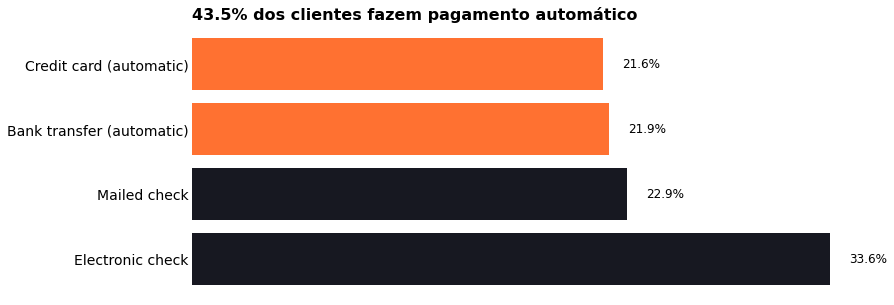

In [493]:
col = 'payment_method'

aux = df_cat_not_binary[col].value_counts(normalize=True).to_frame() * 100
aux = aux.sort_values(col, ascending=False)

cores = [paleta_personalizada['orange'] if 'automatic' in tipo else 
         paleta_personalizada['black'] for tipo in aux.index]

soma_automatic = aux[aux.index.str.contains('automatic')][col].sum()

fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(aux.index, aux[col], color=cores)
ax.yaxis.set_tick_params(labelsize=14)

ax.set_title(f'{soma_automatic:.1f}% dos clientes fazem pagamento automático', 
             loc='left', fontsize=16, fontweight='bold')

for i, v in enumerate(aux[col]):
    formatted_value = '{:.1f}%'.format(v)
    ax.text(v + 1, i, formatted_value, color='black', fontsize=12, ha='left', va='center')
    
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.show()


## 4.2. Análise Bivariada

* Como as variáveis impactam no fenômeno?
* Qual a força deste impacto?
* Levantamento de hipóteses.

### 4.2.1. Numerical Variable

In [497]:
df_num.columns

Index(['tenure', 'charges_monthly', 'charges_total'], dtype='object')

In [571]:
df_num_churn_yes = df4.loc[df4['churn'] == 'Yes', ['churn', 'tenure', 'charges_monthly', 'charges_total']].reset_index(drop=True)
df_num_churn_yes

,churn,tenure,charges_monthly,charges_total
0,Yes,4,73.90,280.85
1,Yes,13,98.00,1237.85
2,Yes,3,83.90,267.40
3,Yes,45,62.70,2791.50
4,Yes,1,25.10,25.10
...,...,...,...,...
1864,Yes,21,96.80,2030.30
1865,Yes,9,83.85,790.15
1866,Yes,1,70.15,70.15
1867,Yes,4,20.95,85.50


In [572]:
num_describe_churn_yes = df_num_churn_yes.describe().T
num_describe_churn_yes['range'] = pd.DataFrame(df_num.apply(lambda x: x.max() - x.min()))
num_describe_churn_yes['skew'] = pd.DataFrame(df_num.apply(lambda x: x.skew()))
num_describe_churn_yes['kurtosis'] = pd.DataFrame(df_num.apply(lambda x: x.kurtosis()))
num_describe_churn_yes

,count,mean,std,min,25%,50%,75%,max,range,skew,kurtosis
tenure,1869.0,17.979133,19.531123,1.00,2.00,10.00,29.0,72.00,71.0,0.239486,-1.385484
charges_monthly,1869.0,74.441332,24.666053,18.85,56.15,79.65,94.2,118.35,100.5,-0.220524,-1.257260
charges_total,1869.0,1531.796094,1890.822994,18.85,134.50,703.55,2331.3,8684.80,8666.0,0.963745,-0.227068


In [ ]:
# Fazer a concentração entre os quartis: o menor range é o mais concentrado
# Usar a skew para falar sobre o deslocamento da mediana 

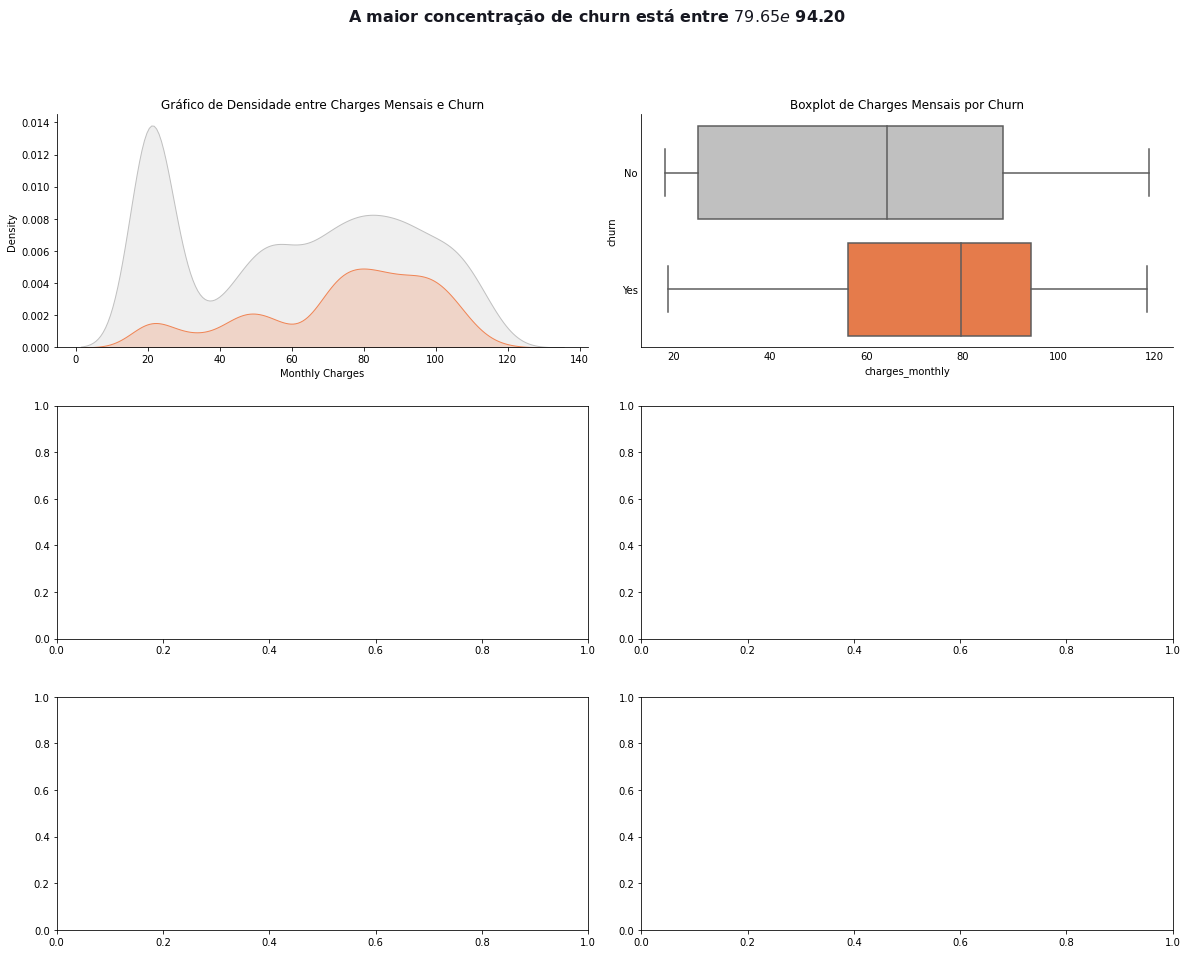

In [609]:
col = 'charges_monthly'

# Criar a matriz de gráficos
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
# fig.subplots_adjust(top=0.8)
fig.subplots_adjust(hspace=0.25, wspace=0.1)

formatted_text = ('A maior concentração de churn está entre $ {:.2f} e $ {:.2f}'.format(
    df_num_churn_yes[col].quantile(.5), df_num_churn_yes[col].quantile(.75)))

fig.suptitle(formatted_text, color=paleta_personalizada['black'], 
             fontsize=16, fontweight='bold')

# Definir a paleta personalizada
paleta_personalizada2 = {'No': 'silver', 'Yes': paleta_personalizada['orange']}

# Atribua a paleta personalizada
sns.set_palette(paleta_personalizada2.values())

# Criar um gráfico de densidade 
sns.kdeplot(data=df4, x=col, hue='churn', fill=True, ax=axs[0, 0])
axs[0, 0].set_xlabel('Monthly Charges')
axs[0, 0].set_ylabel('Density')
axs[0, 0].set_title('Gráfico de Densidade entre Charges Mensais e Churn')
axs[0, 0].legend(title='Churn', labels=[]).set_visible(False)
axs[0, 0].spines[['top', 'right']].set_visible(False)

# Criar um gráfico de densidade 
sns.boxplot(data=df4, x=col, y='churn', orient='h', ax=axs[0,1])
axs[0, 1].set_title('Boxplot de Charges Mensais por Churn')
axs[0, 1].legend(title='Churn', labels=[]).set_visible(False)
axs[0, 1].spines[['top', 'right']].set_visible(False)
axs[0, 1].tick_params(axis='both', which='both', length=0)

plt.show()

<Axes: xlabel='churn', ylabel='charges_monthly'>

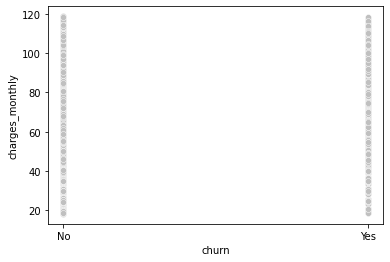

In [611]:
import seaborn as sns

sns.scatterplot(x='churn', y=col, data=df4)


In [ ]:
col = 'churn'

aux = df4[col].value_counts(normalize=True).to_frame() * 100
aux = aux.sort_values(col, ascending=False)

cores = [paleta_personalizada['orange'] if tipo == aux[col].idxmin() else 
         paleta_personalizada['black'] for tipo in aux.index]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(aux.index, aux[col], color=cores)

ax.yaxis.set_tick_params(labelsize=14)
ax.set_title(f'O churn atual é de {aux[col].min():.1f}% dos clientes', 
             loc='left', fontsize=16, fontweight='bold')

for i, v in enumerate(aux[col]):
    formatted_value = '{:.1f}%'.format(v)
    ax.text(v + 1, i, formatted_value, color='black', fontsize=12, ha='left', va='center')
    
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.show()

### 4.2.2. Categorical Variable

## 4.3. Análise Multivariada

* Como as variáveis estão correlacionadas?
* Qual a força de correlação entre elas?
* Identificar e remover colunas que carregam o mesmo conteúdo de informação.

👉 É sempre bom lembrar que correlação não implica causalidade, só pq as variáveis estão correlacionadas não necessariamente uma causa a outra.

# 5. DATA PREPARATION

In [ ]:
df5 = df4.copy()